## PREPARAÇÃO DOS DADOS

**Situações verificadas:**

1 - Necessidade de limpeza e padronização;

2 - Possibilidade de criação de novas características;

3 - Existência de mensagens em diferentes linguagens: Português, Espanhol e Inglês;

4 - Redundância de informação: conteúdo igual diferenciando-se apenas por informações irrelevantes na construção do modelo como identificação do usuário, cidade, etc.

**Tratamentos propostos:**

1 - Tranformação em letras minúsculas, remoção de códigos alfanuméricos, caracteres especiais, remoção de múltiplos espaços, etc. E outros:
- Nome de pessoa: Os nomes com pronome de tratamento foram excluídos, reduzindo bastante esses dados e o restante foi deixado para tratar na extração de característica de acordo com a busca de parâmetros;
- Nomes de cidades: Não foram tratados;
- Links de sites: Boa parte puderam ser identificados e tratados.

2 - Verificou-se padrões para sites com ou sem certificado de segurança, para cpfs e cnpjs, datas, horários, ip e valor monetário em reais. Esses padrões foram implementados com a possibilidade de geraram nova característica.

3 - Isso limitou algumas manipulações dentro prazo de desenvolvimento e o único tratamento foi a consideração de *stopwords* em todas as linguagens.

4 - Foi feita a redução de redundância, uma vez que não se verificou caso a caso a igualdade, mas se estabeleceu condições para a correspondência, de duas formas:
- A própria limpeza dos dados permite a exclusão de informações únicas restando o corpo comum do texto e possibilitando a identificação e remoção das repetidas.
- A tranformação das mensagens em uma matriz de contagem de frequência permite identificar quais palavras aparecem poucas vezes (abaixo de um limiar k) e eliminado-se elas, novas repetições são verificadas e excluídas.

Obs.: A escolha de um k muito baixo mentém mensagens repetidas sem serem identificadas, enquanto um valor muito alto pode levar a excluir mensagens que não são reduntantes, com a falta de tempo para analisar isso com mais cuidado definiu-se k=2, que reduz mil mensagens iniciais do conjunto de treinamento para 1771.

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from reduncance_reduction import RedundanceReduction, STOPS

In [2]:
# Definição do plot das 200 palavras mais frequentes

def plot_wordcloud(texts):    
    nuvem = WordCloud(background_color = 'white',
                      stopwords = STOPS,
                      max_words = 200)
    # Criação e visualização da nuvem de palavras
    nuvem.generate(texts.str.cat(sep="\n"))
    plt.imshow(nuvem)

In [3]:
def print_info(df, k):    
    # Redução de redundância com k = 2
    idx = rr.by_word_frequency(k=k)
    aux = df.iloc[idx]
    n0 = len(aux[aux.LABEL == "ok"])
    n1 = len(aux[aux.LABEL == "blocked"])
    nw = len(np.where(rr.freq > k)[0])
    print("Número de mensagens ok: %s" % n0)
    print("Número de mensagens blocked: %s" % n1)
    print("Número de palavras: %s" % nw)

    plot_wordcloud(aux.SMS)

### Informações sem redução de redundância 

In [4]:
# Leitura dos dados e limpeza
rr = RedundanceReduction("./data_train.csv")
# Contagem de palavras
rr.word_counts()
df = rr.data
n0 = len(df[df.LABEL == "ok"])
n1 = len(df[df.LABEL == "blocked"])
print("Número de mensagens ok: %s" % n0)
print("Número de mensagens blocked: %s" % n1)

plot_wordcloud(df.SMS)

Número de mensagens ok: 4500
Número de mensagens blocked: 1500


### Informações com redução de redundância (k = 1) 

In [5]:
print_info(df, 1)

Número de mensagens ok: 2429
Número de mensagens blocked: 416
Número de palavras: 1510


### Informações com redução de redundância (k = 2) 

Número de mensagens ok: 1458
Número de mensagens blocked: 313
Número de palavras: 935


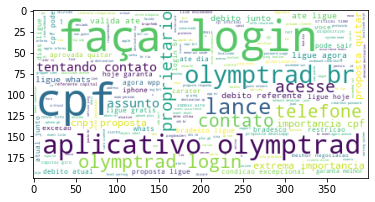

In [6]:
print_info(df, 2)

### Informações com redução de redundância (k = 3) 

Número de mensagens ok: 1114
Número de mensagens blocked: 284
Número de palavras: 696


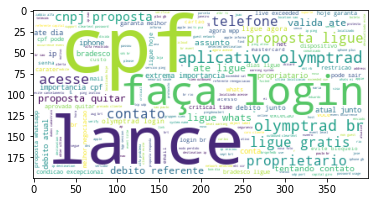

In [7]:
print_info(df, 3)

### Informações com redução de redundância (k = 5) 

Número de mensagens ok: 812
Número de mensagens blocked: 259
Número de palavras: 457


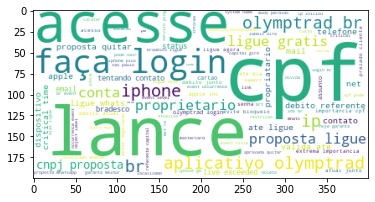

In [8]:
print_info(df, 5)

### Informações com redução de redundância (k = 10) 

In [9]:
print_info(df, 10)

Número de mensagens ok: 525
Número de mensagens blocked: 230
Número de palavras: 234


### CONCLUSÃO

É evidente a redução no número de palavras e no massa de dados com a variação do valor k, como já mencionado o ideal seria usar uma técnica mais precisa para identificação de mensagens reduntantes, ou uma busca pelo melhor valor de k.

In [10]:
index = rr.by_word_frequency(k=2)

## MODELOS

Aqui são apresentados os resultado no conjunto de treinamento, nas seguintes condições:
- O modelo Naive BAyes é avalidado e parametrizado com validação cruzada 5-fold;
- Os resultados apresentados são para divisão aleatória em 2 conjuntos: treinamento e teste, na qual se reconhece que o valor dos resultados podem não o resultado no conjunto de validação, devido a redundância;
- A divisão dos conjuntos de dados é feita em 70\% treinamento e 30 teste, com estratificação das classes de saída;
- Avaliou-se apnas para a configuração dos dados sem a adição de novas carcaterísticas.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from classification_model import Model

In [12]:
data = df.iloc[index]
X_train, X_test, y_train, y_test = train_test_split(data.SMS, data.LABEL, test_size=0.3,
                                                    stratify=data.LABEL,  random_state=42)

Um exemplo do problema da redundância é verificado no exemplo 5842 do conjunto de treinamento que aparece no conjunto de testo o 3410.

In [13]:
X_train

4725    dayane proprietario do cpf seu a mastercard de...
4671     ca faça login no aplicativo olymptrad br barr...
5968                           olymptrad login br taquara
101      apple informa seu dispositivo apple foi local...
366                        victor voce tem uma nova foto 
                              ...                        
617      apple inc seu iphone foi localizado pelo serv...
3212    bruna proprietario do cpf seu debito atual jun...
2215    estamos tentando contato com juliana assunto d...
517     banco do brasil informa atualize numero do cel...
5241              the target machine actively refused it 
Name: SMS, Length: 1239, dtype: object

In [14]:
X_test

1644    leonardo vivo bom dia dario segue mail para co...
5103    brenda propriatario do cpf seu a mastercard de...
4884      faça login no aplicativo olymptrad br joinville
4330                                  am server timed out
42      lphone ha sido encontrado las pm on december e...
                              ...                        
3200                                 sa ntw res algar br 
2735    o servico ping no dispositivo ap saltoriodaspe...
3515          faça login no aplicativo olymptrad br macae
5410    alex propriatario do cpf seu a mastercard de l...
1925    estamos tentando contato com adao assunto de e...
Name: SMS, Length: 532, dtype: object

In [15]:
y_test = np.where(y_test == "ok", 0, 1)
ml = Model(df.iloc[X_train.index])

1239


### Avaliação


O modelo responde a pergunta: A mensagem deve ser bloqueda?

Assim, as resposta possiveiss são (0) Negativo e (1) Positivo.

Dessa forma, as possíveis classificações são:

- Verdadeiro positivo: Classifica uma mensagem que deve ser bloqueda como bloqueda;
- Falso Positivo: Classifica uma mensagem ok em bloqueda;
- Verdadeiro negativo: Classifica uma mensagem ok, como não deve ser bloqueda; e
- Falso negativo: Classifica uma mensagem que deve ser bloqueda como ok.

Considere a precição da classe 1: A probabilidade do classificador estar certo ao classificar uma mensagem como bloqueada; e

Considere o recall da classe 2: A proporção das mensagens bloquadas classificadas corretamente.

In [26]:
ypred = ml.test_predict("naive_bayes", X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       438
           1       0.99      0.93      0.96        94

    accuracy                           0.98       532
   macro avg       0.99      0.96      0.97       532
weighted avg       0.99      0.98      0.98       532



Dessa forma, o resultado indica ao receber uma mensagem que deve ser bloqueada a probabilidade do modelo bloqueá-la é de 93%. E, por outro lado, dado que o modelo blouqeou uma mensagem a probabilidade dele estar certo é de 96%.

## CLASSIFICAÇÃO DO CONJUNTO DE VALIDAÇÂO

In [27]:
rr = RedundanceReduction("validation_data.csv")
rr.word_counts()
df = rr.data

In [34]:
ml = Model(data)
ypred = ml.test_predict("naive_bayes", df.SMS)

1771


In [36]:
df["LABEL"] = np.where(ypred == 0, "ok", "blocked")

In [38]:
df.to_csv("validation_data.csv", index=False)